# Merge data sets & perform preliminary EDA
- bring in data from different files
- join on the RID
- subset to baseline data
- examine data validity by checking against the summary stats

In [10]:
import pandas as pd

import io

import numpy as np

import tokenize

import nltk

from tokenize import tokenize

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/leslieappiah/Desktop/ADNI_DATA/ADNI_Participant_Age_Distribution_08-22-2022.csv')

In [4]:
df.shape

(12, 2)

In [3]:
df.head()

,Age Group,Number of Subjects
0,Under 2,2
1,2-11,0
2,12-18,0
3,19-29,0
4,30-39,0


In [8]:
df

,Age Group,Number of Subjects
0,Under 2,2
1,2-11,0
2,12-18,0
3,19-29,0
4,30-39,0
5,40-49,1
6,50-59,128
7,60-69,804
8,70-79,1286
9,80-89,469


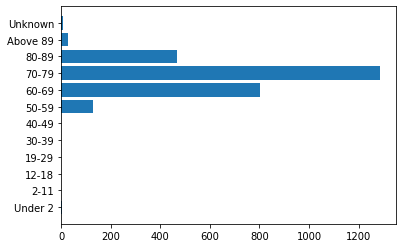

In [11]:
fig, ax1 = plt.subplots(1,1)

ax1.barh(df['Age Group'],df['Number of Subjects'])

plt.show()

# Demographics

In [12]:
df_demo = pd.read_csv('/Users/leslieappiah/Google Drive/My Drive/Desktop/ADNI_DATA/subject_demo.txt')

In [7]:
df_demo.shape

(4847, 32)

In [6]:
df_demo.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTTLANG,PTPLANG,PTPSPEC,PTCOGBEG,PTMCIBEG,PTADBEG,PTADDX,PTETHCAT,PTRACCAT,update_stamp
0,ADNI1,18,2,107,sc,sc,2005-08-17,NaN,1.0,1.0,...,1.0,1.0,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-17 00:00:00.0
1,ADNI1,20,1,10,f,f,2005-08-18,NaN,1.0,2.0,...,-4.0,-4.0,-4,NaN,NaN,-4.0,NaN,-4.0,-4.0,2005-08-18 00:00:00.0
2,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1.0,1.0,...,1.0,1.0,-4,NaN,NaN,1999.0,NaN,2.0,5.0,2005-08-18 00:00:00.0
3,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1.0,1.0,...,2.0,2.0,-4,NaN,NaN,-4.0,NaN,1.0,5.0,2005-08-18 00:00:00.0
4,ADNI1,26,5,107,sc,sc,2005-08-23,NaN,1.0,1.0,...,1.0,1.0,-4,NaN,NaN,-4.0,NaN,2.0,5.0,2005-08-23 00:00:00.0


# CFA Biomarkers

In [13]:
df_biomarker2021 = pd.read_csv('/Users/leslieappiah/Google Drive/My Drive/Desktop/ADNI_DATA/csf_biomarker_4_2021.txt')

In [12]:
df_biomarker2021.shape

(216, 12)

In [13]:
df_biomarker2021.head()

,RID,VISCODE,VISCODE2,EXAMDATE,PROT,RUNDATE,AB40,ABETA,PTAU,TAU,AB4240,NOTE
0,89,nv,nv,2019-08-07,ADNI3,2020-08-21,14760,1250.0,14.58,160.7,0.08469,NaN
1,96,y2,m156,2019-06-21,ADNI3,2020-08-21,9670,804.5,14.12,156.7,0.08320,NaN
2,139,nv,m48,2010-03-19,ADNI 1,2020-08-25,14330,544.4,40.37,389.8,0.03799,NaN
3,243,nv,m12,2007-04-10,ADNI 1,2020-08-24,16140,611.5,57.79,542.3,0.03789,NaN
4,316,nv,bl,2006-04-25,ADNI 1,2020-08-24,16890,336.9,40.60,372.2,0.01995,NaN


In [18]:
df_biomarker2021[['ABETA','TAU','PTAU']].describe()

,ABETA,TAU,PTAU
count,214.000000,215.000000,215.000000
mean,1140.707009,265.679721,24.972930
std,664.619267,124.330524,13.848932
min,245.200000,95.940000,8.500000
25%,648.675000,181.350000,15.790000
50%,1001.100000,236.600000,21.290000
75%,1497.500000,313.150000,29.135000
max,4779.000000,761.800000,89.500000


In [331]:
df_biomarker2017 = pd.read_csv('/Users/leslieappiah/Google Drive/My Drive/Desktop/ADNI_DATA/csf_biomarker_4_2017.txt')

In [15]:
df_biomarker2017.shape

(2401, 14)

In [16]:
df_biomarker2017.head()

,RID,VISCODE,VISCODE2,EXAMDATE,PHASE,BATCH,KIT,STDS,RUNDATE,ABETA,TAU,PTAU,COMMENT,update_stamp
0,3,bl,bl,2005-09-12,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,741.5,239.7,22.83,NaN,2017-04-20 14:39:54.0
1,3,m12,m12,2006-09-13,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-14,601.4,251.7,24.18,NaN,2017-04-20 14:39:54.0
2,4,bl,bl,2005-11-22,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-09,1501,153.1,13.29,NaN,2017-04-20 14:39:54.0
3,4,m12,m12,2006-11-28,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2017-01-09,1176,159.7,13.3,NaN,2017-04-20 14:39:54.0
4,5,m12,m12,2006-09-06,ADNI1,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-11-22,472.8,334.1,34.04,NaN,2017-04-20 14:39:54.0


In [24]:
df_biomarker2017[['ABETA','TAU','PTAU']].describe()

,ABETA,TAU,PTAU
count,2399,2399,2398
unique,1733,1795,1801
top,>1700,<80,<8
freq,356,8,11


# Replace all ptau <8 and tau <80 with 8 and 80 respectively since their corresponding comments are NaN

In [175]:
def drop_less_or_greater_than_signs(df,feature_use, char_use_1, char_use_2):
    
    collect = []
    
    feature_list = df[feature_use].tolist()
    
    for instance in feature_list:
        
        instance_use = str(instance)
            
        if instance_use.startswith(char_use_1) | instance_use.startswith(char_use_2):
                
            collect.append(float(instance_use[1:len(instance_use)]))
                
        else:
                
            collect.append(float(instance_use))
            
    df_use = df
    
    df_use[feature_use] = collect
            
    return df_use

In [330]:
def drop_less_or_greater_than_signs_abeta(df,feature_use, char_use_1, char_use_2):
    
    collect = []
    
    # fetch data from comments

    for abeta, comment in zip(df[feature_use],df['COMMENT']):
        
        abeta_use = str(abeta); comment_use = str(comment)
        
        if abeta_use.startswith(char_use_1) | abeta_use.startswith(char_use_2) and len(comment_use[28:32]) != 0:
            
            collect.append(float(comment_use[28:32]))
            
        elif abeta_use.startswith(char_use_1) | abeta_use.startswith(char_use_2) and len(comment_use[28:32]) == 0 or len(comment_use[28:32]) == np.nan:
            
            collect.append(831) # replace with the median
            
        else:
            
            collect.append(float(abeta_use))
        
    df_use = df
    
    df_use['ABETA'] = collect
    
    return df_use

In [332]:
df_abeta_cleaned = drop_less_or_greater_than_signs_abeta(df_biomarker2017,'ABETA', '>', '<')

In [344]:
df_abeta_cleaned.shape

(2401, 14)

In [333]:
df_abeta_cleaned['ABETA'].describe()

count    2399.000000
mean     1023.110713
std       596.840298
min       203.000000
25%       571.800000
50%       831.300000
75%      1376.000000
max      3592.000000
Name: ABETA, dtype: float64

<AxesSubplot:ylabel='Frequency'>

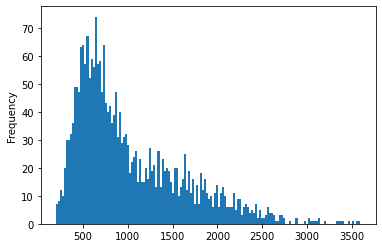

In [335]:
df_abeta_cleaned['ABETA'].plot(kind='hist',bins=150)

In [336]:
df_abeta_tau_cleaned = drop_less_or_greater_than_signs(df_abeta_cleaned,'TAU', '<','>')

In [345]:
df_abeta_tau_cleaned.shape

(2401, 14)

In [337]:
df_abeta_tau_cleaned['TAU'].describe()

count    2399.000000
mean      293.679483
std       131.459787
min        80.000000
25%       203.200000
50%       264.900000
75%       357.800000
max      1300.000000
Name: TAU, dtype: float64

<AxesSubplot:ylabel='Frequency'>

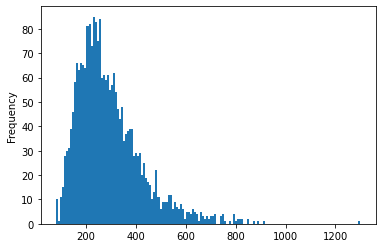

In [339]:
df_abeta_tau_cleaned['TAU'].plot(kind = 'hist', bins = 150)

In [340]:
df_abeta_tau_ptau_cleaned= drop_less_or_greater_than_signs(df_abeta_tau_cleaned,'PTAU', '<','>')

In [346]:
df_abeta_tau_ptau_cleaned.shape

(2401, 14)

In [341]:
df_abeta_tau_ptau_cleaned['PTAU'].describe()

count    2398.000000
mean       28.130179
std        14.458531
min         8.000000
25%        17.850000
50%        24.540000
75%        34.572500
max       120.000000
Name: PTAU, dtype: float64

<AxesSubplot:ylabel='Frequency'>

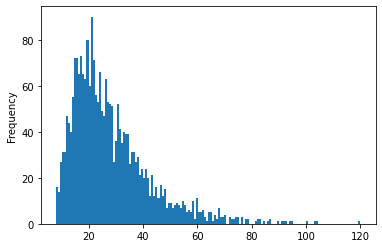

In [343]:
df_abeta_tau_ptau_cleaned['PTAU'].plot(kind = 'hist', bins = 150)

# Combine the 2021 and 2017 biomarker datasets on common columns

In [348]:
collect_common_biomarker_columns_2017_2021 = []

for i in df_biomarker2021.columns:
    
    for j in df_biomarker2017.columns:
        
        if i == j:
            
            collect_common_biomarker_columns_2017_2021.append(i)
        
        else:
            
            pass

collect_common_biomarker_columns_2017_2021

['RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'RUNDATE', 'ABETA', 'PTAU', 'TAU']

In [350]:
biomarker_df_2021_subset = df_biomarker2021[collect_common_biomarker_columns_2017_2021]

biomarker_df_2017_subset = df_biomarker2017[collect_common_biomarker_columns_2017_2021]

In [353]:
biomarker_df_2021_subset.shape

(216, 8)

In [354]:
biomarker_df_2017_subset.shape

(2401, 8)

In [351]:
df_biomarkers2017_2021 = pd.concat([biomarker_df_2021_subset,biomarker_df_2017_subset])

In [352]:
df_biomarkers2017_2021.shape

(2617, 8)

In [360]:
df_biomarkers2017_2021.head()

,RID,VISCODE,VISCODE2,EXAMDATE,RUNDATE,ABETA,PTAU,TAU
0,89,nv,nv,2019-08-07,2020-08-21,1250.0,14.58,160.7
1,96,y2,m156,2019-06-21,2020-08-21,804.5,14.12,156.7
2,139,nv,m48,2010-03-19,2020-08-25,544.4,40.37,389.8
3,243,nv,m12,2007-04-10,2020-08-24,611.5,57.79,542.3
4,316,nv,bl,2006-04-25,2020-08-24,336.9,40.60,372.2


In [361]:
df_biomarkers2017_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 2400
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RID       2617 non-null   int64  
 1   VISCODE   2617 non-null   object 
 2   VISCODE2  2617 non-null   object 
 3   EXAMDATE  2617 non-null   object 
 4   RUNDATE   2617 non-null   object 
 5   ABETA     2613 non-null   float64
 6   PTAU      2613 non-null   float64
 7   TAU       2614 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 184.0+ KB


# Merge biomarker data and demographics

### ****Check comon RID's

In [362]:
common = []

for i in df_biomarkers2017_2021['RID']:
    
    for j in df_demo['RID']:
        
        if i == j:
            
            common.append(i)
len(common)

4082

In [358]:
df_demo.columns

Index(['Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE',
       'USERDATE2', 'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'PTADBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT',
       'update_stamp'],
      dtype='object')

In [363]:
df_demo.merge?

In [376]:
df_demo_biomarker = df_demo.merge(df_biomarkers2017_2021,how='inner',on='RID')

In [377]:
df_demo_biomarker.shape

(4082, 39)

In [367]:
df_demo_biomarker_deduped = df_demo_biomarker.drop_duplicates()

In [368]:
df_demo_biomarker_deduped.shape

(4082, 39)

In [369]:
df_demo_biomarker_deduped.head()

,Phase,ID,RID,SITEID,VISCODE_x,VISCODE2_x,USERDATE,USERDATE2,PTSOURCE,PTGENDER,...,PTETHCAT,PTRACCAT,update_stamp,VISCODE_y,VISCODE2_y,EXAMDATE,RUNDATE,ABETA,PTAU,TAU
0,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1.0,1.0,...,2.0,5.0,2005-08-18 00:00:00.0,bl,bl,2005-09-12,2016-12-14,741.5,22.83,239.7
1,ADNI1,22,3,107,sc,sc,2005-08-18,NaN,1.0,1.0,...,2.0,5.0,2005-08-18 00:00:00.0,m12,m12,2006-09-13,2016-12-14,601.4,24.18,251.7
2,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1.0,1.0,...,1.0,5.0,2005-08-18 00:00:00.0,bl,bl,2005-11-22,2017-01-09,1501.0,13.29,153.1
3,ADNI1,24,4,10,sc,sc,2005-08-18,NaN,1.0,1.0,...,1.0,5.0,2005-08-18 00:00:00.0,m12,m12,2006-11-28,2017-01-09,1176.0,13.30,159.7
4,ADNI1,26,5,107,sc,sc,2005-08-23,NaN,1.0,1.0,...,2.0,5.0,2005-08-23 00:00:00.0,m12,m12,2006-09-06,2016-11-22,472.8,34.04,334.1


In [4]:
# df_visits = pd.read_csv('/Users/leslieappiah/Desktop/ADNI_DATA/ADNI_Participant_Visit_Distribution_08-22-2022.csv')

In [379]:
# df_diagnosis = pd.read_csv('./Diagnosis/ADSXLIST.csv')

## ** We use the all diagnosis because it covers all the phases ADNI1,2,3 & GO

In [384]:
df_diagnosis_all = pd.read_csv('./Diagnosis/DXSUM_PDXCONV_ADNIALL.csv')

In [385]:
df_diagnosis_all.head()

,Phase,ID,RID,PTID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,DIAGNOSIS,update_stamp
0,ADNI1,2.0,2,011_S_0002,107,bl,bl,2005-10-01,NaN,2005-09-29,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2005-10-01 00:00:00.0
1,ADNI1,336.0,2,011_S_0002,107,m06,m06,2006-04-27,NaN,2006-03-06,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2006-04-27 00:00:00.0
2,ADNI1,4.0,3,011_S_0003,107,bl,bl,2005-10-01,NaN,2005-09-30,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,3.0,NaN,2005-10-01 00:00:00.0
3,ADNI1,338.0,3,011_S_0003,107,m06,m06,2006-04-27,NaN,2006-03-13,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-04-27 00:00:00.0
4,ADNI1,990.0,3,011_S_0003,107,m12,m12,2006-09-14,NaN,2006-09-13,...,-4.0,-4,NaN,NaN,-4.0,-4.0,-4,4.0,NaN,2006-09-14 00:00:00.0


In [386]:
df_diagnosis_all.Phase.value_counts()

ADNI2     5671
ADNI1     3868
ADNI3     3232
ADNIGO     475
Name: Phase, dtype: int64

In [387]:
df_diagnosis_all.shape

(13246, 54)

In [388]:
df_diagnosis_all.DIAGNOSIS.value_counts()

1.0    1679
2.0    1138
3.0     401
Name: DIAGNOSIS, dtype: int64

In [393]:
df_diagnosis_all.columns

Index(['Phase', 'ID', 'RID', 'PTID', 'SITEID', 'VISCODE', 'VISCODE2',
       'USERDATE', 'USERDATE2', 'EXAMDATE', 'DXCHANGE', 'DXCURREN', 'DXCONV',
       'DXCONTYP', 'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1',
       'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE',
       'DXMOTHET', 'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP',
       'DXAPROB', 'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP',
       'DXAOTHSP', 'DXPARK', 'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP',
       'DXPOTHSP', 'DXDEP', 'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP',
       'DXCONFID', 'DIAGNOSIS', 'update_stamp'],
      dtype='object')

# Merge diagnoses data with demo and biomarker data

In [394]:
df_demo_biomarker_diagnoses = df_diagnosis_all.merge(df_demo_biomarker_deduped, how='inner', on=['RID'])

In [395]:
df_demo_biomarker_diagnoses_deduped = df_demo_biomarker_diagnoses.drop_duplicates()

In [396]:
df_demo_biomarker_diagnoses_deduped.shape

(33136, 92)

In [397]:
df_demo_biomarker_diagnoses_deduped.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,PTETHCAT,PTRACCAT,update_stamp_y,VISCODE_y,VISCODE2_y,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU
0,ADNI1,4.0,3,011_S_0003,107,bl,bl,2005-10-01,NaN,2005-09-30,...,2.0,5.0,2005-08-18 00:00:00.0,bl,bl,2005-09-12,2016-12-14,741.5,22.83,239.7
1,ADNI1,4.0,3,011_S_0003,107,bl,bl,2005-10-01,NaN,2005-09-30,...,2.0,5.0,2005-08-18 00:00:00.0,m12,m12,2006-09-13,2016-12-14,601.4,24.18,251.7
2,ADNI1,338.0,3,011_S_0003,107,m06,m06,2006-04-27,NaN,2006-03-13,...,2.0,5.0,2005-08-18 00:00:00.0,bl,bl,2005-09-12,2016-12-14,741.5,22.83,239.7
3,ADNI1,338.0,3,011_S_0003,107,m06,m06,2006-04-27,NaN,2006-03-13,...,2.0,5.0,2005-08-18 00:00:00.0,m12,m12,2006-09-13,2016-12-14,601.4,24.18,251.7
4,ADNI1,990.0,3,011_S_0003,107,m12,m12,2006-09-14,NaN,2006-09-13,...,2.0,5.0,2005-08-18 00:00:00.0,bl,bl,2005-09-12,2016-12-14,741.5,22.83,239.7


## ** Baseline data

In [399]:
df_baseline = df_demo_biomarker_diagnoses_deduped[df_demo_biomarker_diagnoses_deduped['VISCODE']=='bl']

df_baseline.shape

(2904, 92)

## ** Baseline data and no diagnosis

In [400]:
filter_use_bn = (df_demo_biomarker_diagnoses_deduped['VISCODE']=='bl') & (df_demo_biomarker_diagnoses_deduped['DIAGNOSIS'].isnull())

df_baseline_normal = df_demo_biomarker_diagnoses_deduped[filter_use_bn]

In [401]:
df_baseline_normal.shape

(2778, 92)

In [404]:
df_baseline_normal.columns

Index(['Phase_x', 'ID_x', 'RID', 'PTID', 'SITEID_x', 'VISCODE', 'VISCODE2',
       'USERDATE_x', 'USERDATE2_x', 'EXAMDATE_x', 'DXCHANGE', 'DXCURREN',
       'DXCONV', 'DXCONTYP', 'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES',
       'DXMPTR1', 'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6',
       'DXMDUE', 'DXMOTHET', 'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES',
       'DXAPP', 'DXAPROB', 'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP',
       'DXAMETSP', 'DXAOTHSP', 'DXPARK', 'DXPARKSP', 'DXPDES', 'DXPCOG',
       'DXPATYP', 'DXPOTHSP', 'DXDEP', 'DXDEPSP', 'DXOTHDEM', 'DXODES',
       'DXOOTHSP', 'DXCONFID', 'DIAGNOSIS', 'update_stamp_x', 'Phase_y',
       'ID_y', 'SITEID_y', 'VISCODE_x', 'VISCODE2_x', 'USERDATE_y',
       'USERDATE2_y', 'PTSOURCE', 'PTGENDER', 'PTDOBMM', 'PTDOBYY', 'PTHAND',
       'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTWRECNT', 'PTNOTRT',
       'PTRTYR', 'PTHOME', 'PTOTHOME', 'PTTLANG', 'PTPLANG', 'PTPSPEC',
       'PTCOGBEG', 'PTMCIBEG', 'P

In [418]:
df_baseline_normal['DXCONTYP'].value_counts()

-4.0    2329
 3.0       2
Name: DXCONTYP, dtype: int64

In [411]:
df_demo_biomarker_diagnoses_deduped.Phase_y.value_counts()

ADNI2     15680
ADNI1      9074
ADNIGO     7960
ADNI3       422
Name: Phase_y, dtype: int64

In [412]:
df_baseline_normal.Phase_y.value_counts()

ADNI1     1196
ADNIGO     800
ADNI2      782
Name: Phase_y, dtype: int64

## ** Baseline with diagnosis

In [402]:
filter_use_bn = (df_demo_biomarker_diagnoses_deduped['VISCODE']=='bl') & (df_demo_biomarker_diagnoses_deduped['DIAGNOSIS'].notnull())

df_baseline_not = df_demo_biomarker_diagnoses_deduped[filter_use_bn]

In [403]:
df_baseline_not['DIAGNOSIS'].value_counts()

1.0    56
2.0    52
3.0    18
Name: DIAGNOSIS, dtype: int64

In [419]:
df_baseline_not['DXCONTYP'].value_counts()

Series([], Name: DXCONTYP, dtype: int64)

# Baseline diagnosis change

In [421]:
diagno_baseline = pd.read_csv('/Users/leslieappiah/Google Drive/My Drive/Desktop/ADNI_DATA/diagno_baseline_changes.txt')

In [423]:
diagno_baseline.shape

(13411, 27)

In [422]:
diagno_baseline.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,BCPREDX,...,BCCDR,BCDEPRES,BCSTROKE,BCDELIR,BCEXTCIR,BCEXTSP,BCCORADL,BCCORCOG,BCSUMM,update_stamp
0,ADNI1,2,7,10,bl,bl,2005-10-13,NaN,2005-10-06,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,Patient has a three year history of gradually ...,2005-10-13 00:00:00.0
1,ADNI1,4,15,4,bl,bl,2005-10-19,NaN,2005-10-19,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,The subject has no complaints of memory proble...,2005-10-19 00:00:00.0
2,ADNI1,6,30,11,bl,bl,2005-10-20,NaN,2005-10-20,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,MCI-stable. Developed severe constipation/abd...,2005-10-20 00:00:00.0
3,ADNI1,8,31,11,bl,bl,2005-10-24,NaN,2005-10-24,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,Few minor symptoms.,2005-10-24 00:00:00.0
4,ADNI1,10,14,10,bl,bl,2005-11-08,NaN,2005-11-04,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,A 78 year old hispanic female with no memory c...,2005-11-08 00:00:00.0


In [424]:
diagno_baseline.columns

Index(['Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE',
       'USERDATE2', 'EXAMDATE', 'BCPREDX', 'BCADAS', 'BCMMSE', 'BCMMSREC',
       'BCNMMMS', 'BCNEUPSY', 'BCNONMEM', 'BCFAQ', 'BCCDR', 'BCDEPRES',
       'BCSTROKE', 'BCDELIR', 'BCEXTCIR', 'BCEXTSP', 'BCCORADL', 'BCCORCOG',
       'BCSUMM', 'update_stamp'],
      dtype='object')

## Look at patients rid from baseline with no diagno and diagno baseline change

In [509]:
rid_baseline_no_diagno = df_baseline_normal['RID'].tolist()

rid_diagno_baseline = diagno_baseline['RID'].tolist()

In [511]:
common_rids = []

for i in rid_baseline_no_diagno:
    
    for j in rid_diagno_baseline:
        
        if i == j:
            
            common_rids.append(i)
        
        else:
            
            pass

        # get unique rid
len([*set(common_rids)])

548

In [522]:
unique_common_rids = [*set(common_rids)]

In [523]:
len(unique_common_rids)

548

In [544]:
collect_common_rid_list = []

for rid in unique_common_rids:
    
    collect_common_rid_list.append(diagno_baseline[diagno_baseline['RID']==rid])

collect_common_rid_df = pd.concat(collect_common_rid_list)

In [545]:
collect_common_rid_df.shape

(3624, 27)

In [546]:
collect_common_rid_df['BCSUMM'].value_counts()

-4                                                                                                                                                                                                                                                                     1573
no change                                                                                                                                                                                                                                                                20
no changes                                                                                                                                                                                                                                                               16
No change                                                                                                                                                                                           

## Get all rid that matches no change in baseline diagnosis

In [547]:
w = collect_common_rid_df['BCSUMM'].str.lower()

In [548]:
rid = collect_common_rid_df['RID']

In [549]:
collect_rid = []
for j, r in zip(w,rid):
    if type(j) == str and j != np.nan:
        t = nltk.word_tokenize(j)
        if 'no' in t and 'change' in t:
            collect_rid.append(r)
        else:
            pass
    else:
        pass

In [550]:
unique_collect_rid = [*set(collect_rid)]

In [551]:
len(unique_collect_rid)

200

In [553]:
collect_rid_list = []

for rid in unique_collect_rid:
    
    collect_rid_list.append(collect_common_rid_df[collect_common_rid_df['RID']==rid])
    
collect_rid_df = pd.concat(collect_rid_list)

In [554]:
collect_rid_df.shape

(1513, 27)

In [555]:
collect_rid_df['BCSUMM'].value_counts()

-4                                                                                                                                                                             441
no change                                                                                                                                                                       20
No change                                                                                                                                                                       13
No change.                                                                                                                                                                       5
no changes                                                                                                                                                                       5
                                                                                                         

In [556]:
w_1 = collect_rid_df['BCSUMM']

rid_1 = collect_rid_df['RID']

In [557]:
collect_rid_with_no_ad_mci = []
for j, r in zip(w_1,rid_1):
    if type(j) == str and j != np.nan:
        t = nltk.word_tokenize(j)
        if 'no' in t and 'change' in t:
            collect_rid_with_no_ad_mci.append(r)
        else:
            pass
    else:
        pass

In [558]:
unique_collect_rid_with_no_ad_mci = [*set(collect_rid_with_no_ad_mci)]

In [559]:
len(unique_collect_rid_with_no_ad_mci)

106

In [560]:
collect_further_rid_list =[]

for rid in unique_collect_rid_with_no_ad_mci:
    
    collect_further_rid_list.append(collect_rid_df[collect_rid_df['RID']==rid])
    
collect_further_rid_df = pd.concat(collect_further_rid_list)

In [562]:
collect_further_rid_df.shape

(831, 27)

In [563]:
collect_further_rid_df['BCSUMM'].value_counts()

-4                                                                                                                                                                             208
no change                                                                                                                                                                       20
stable MCI                                                                                                                                                                       3
no changes                                                                                                                                                                       3
patient remains normal control                                                                                                                                                   2
                                                                                                         

In [564]:
collect_further_rid_df.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,BCPREDX,...,BCCDR,BCDEPRES,BCSTROKE,BCDELIR,BCEXTCIR,BCEXTSP,BCCORADL,BCCORCOG,BCSUMM,update_stamp
28,ADNI1,58,8,107,bl,bl,2006-01-05,NaN,2005-09-19,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4,2006-01-05 00:00:00.0
170,ADNI1,344,8,107,m06,m06,2006-04-27,NaN,2006-03-20,1.0,...,0.0,0.0,0.0,0.0,0.0,-4,0.0,0.0,-4,2006-04-27 00:00:00.0
524,ADNI1,1052,8,107,m12,m12,2006-09-20,NaN,2006-09-20,1.0,...,0.0,0.0,0.0,0.0,0.0,-4,0.0,0.0,-4,2006-09-20 00:00:00.0
2895,ADNI1,5798,8,107,m36,m36,2008-09-17,NaN,2008-09-09,1.0,...,0.0,0.0,0.0,0.0,0.0,-4,-1.0,-1.0,NO CHANGE REMAINS NORMAL CONTROL,2008-09-17 00:00:00.0
3494,ADNI1,6996,8,107,m48,m48,2009-10-16,NaN,2009-10-12,1.0,...,0.0,0.0,0.0,0.0,0.0,-4,-1.0,-1.0,There is no change in the participant's clinic...,2009-10-16 00:00:00.0


In [565]:
collect_further_rid_df['VISCODE'].value_counts()

bl      106
m06     105
m12      77
v06      73
v11      68
m24      59
v21      54
v31      52
m36      51
v41      37
m18      34
m48      30
init     23
y1       17
y2       13
m60       8
v51       8
y4        6
y3        6
y5        3
m72       1
Name: VISCODE, dtype: int64

## We get the bl from collect_further_rid_df and use that to subset the dataset  df_demo_biomarker_diagnoses

In [567]:
get_common_rid = []

for i in df_demo_biomarker_diagnoses_deduped['RID']:
    
    for j in diagno_baseline['RID']:
        
        if i == j:
            
            get_common_rid.append(i)
        
        else:
            
            pass
                
                
unique_get_common_rid = [*set(get_common_rid)]

In [568]:
len(unique_get_common_rid)

1383

In [569]:
get_common_rid_list = []

for rid in unique_get_common_rid:
    
    get_common_rid_list.append(diagno_baseline[diagno_baseline['RID']==rid])
    
get_common_rid_list_df = pd.concat(get_common_rid_list)

In [570]:
get_common_rid_list_df.shape

(8437, 27)

In [573]:
get_common_rid_list_df['VISCODE'].value_counts()

v11     789
v03     710
v01     710
v21     693
bl      673
v05     661
m06     528
m12     409
v31     397
v41     378
m24     359
init    342
y2      295
v06     256
m36     253
y1      227
m18     179
y4      145
m48     136
sc      125
v51      57
y3       55
m60      34
y5       23
m72       3
Name: VISCODE, dtype: int64

# Now we get the bl to define our baseline

In [590]:
get_common_rid_list_df.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,BCPREDX,...,BCCDR,BCDEPRES,BCSTROKE,BCDELIR,BCEXTCIR,BCEXTSP,BCCORADL,BCCORCOG,BCSUMM,update_stamp
26,ADNI1,54,3,107,bl,bl,2006-01-05,NaN,2005-09-12,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,-4,2006-01-05 00:00:00.0
168,ADNI1,340,3,107,m06,m06,2006-04-27,NaN,2006-03-13,3.0,...,0.0,0.0,0.0,0.0,0.0,-4,0.0,0.0,-4,2006-04-27 00:00:00.0
493,ADNI1,990,3,107,m12,m12,2006-09-14,NaN,2006-09-13,3.0,...,0.0,0.0,0.0,0.0,0.0,-4,0.0,0.0,-4,2006-09-14 00:00:00.0
1893,ADNI1,3792,3,107,m24,m24,2007-09-22,NaN,2007-09-12,3.0,...,1.0,0.0,0.0,0.0,0.0,-4,-1.0,1.0,-4,2007-09-22 00:00:00.0
9,ADNI1,20,4,10,bl,bl,2005-11-18,NaN,2005-11-08,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,A 67 year old hispanic male with cognitive pro...,2005-11-18 00:00:00.0


In [574]:
get_common_rid_list_df_baseline = get_common_rid_list_df[get_common_rid_list_df['VISCODE']=='bl']

In [575]:
get_common_rid_list_df_baseline.shape

(673, 27)

## Let's check the BCSUMM comments

In [576]:
get_common_rid_list_df_baseline['BCSUMM'].value_counts()

-4                                                                 227
no change                                                           12
no changes                                                          11
No change in diagnosis. Remains MCI.                                 3
No change in diagnosis                                               3
                                                                  ... 
No changes from screening visit.                                     1
Major problem is memory.                                             1
No change in diagnosis since screening visit                         1
Patient confirmed - probable Alzheimer disease diagnosis (mild)      1
MCI                                                                  1
Name: BCSUMM, Length: 358, dtype: int64

## For now we take the missing comment -4 as indicative of normal (227)

In [577]:
get_common_rid_list_df_baseline_normal = get_common_rid_list_df_baseline[get_common_rid_list_df_baseline['BCSUMM']=='-4']

In [578]:
get_common_rid_list_df_baseline_normal.shape

(227, 27)

In [583]:
baseline_pt_rid = [*set(get_common_rid_list_df_baseline_normal['RID'])]

collect_normal_bline_pt_list = []

for rid in baseline_pt_rid:
    
    collect_normal_bline_pt_list.append(df_demo_biomarker_diagnoses_deduped[df_demo_biomarker_diagnoses_deduped['RID']==rid])
    
collect_normal_bline_pt_df = pd.concat(collect_normal_bline_pt_list)

In [584]:
collect_normal_bline_pt_df.shape

(9601, 92)

In [585]:
collect_normal_bline_pt_df.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,PTETHCAT,PTRACCAT,update_stamp_y,VISCODE_y,VISCODE2_y,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU
9339,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,m12,m12,2007-06-13,2016-11-28,873.0,11.26,137.6
9340,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,bl,bl,2006-06-16,2016-11-28,826.8,10.41,126.6
9341,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,m48,m48,2010-06-16,2016-11-28,653.6,9.80,122.9
9342,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,m36,m36,2009-06-17,2016-11-28,879.2,11.38,138.6
9343,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2013-05-30 10:05:05.0,m12,m12,2007-06-13,2016-11-28,873.0,11.26,137.6


In [592]:
filter_bl = (collect_normal_bline_pt_df['VISCODE']=='bl') & (collect_normal_bline_pt_df['VISCODE_y']=='bl')

In [593]:
collect_normal_bline_pt_df2 = collect_normal_bline_pt_df[filter_bl]

In [594]:
collect_normal_bline_pt_df2.shape

(381, 92)

In [595]:
collect_normal_bline_pt_df2.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,PTETHCAT,PTRACCAT,update_stamp_y,VISCODE_y,VISCODE2_y,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU
9340,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,bl,bl,2006-06-16,2016-11-28,826.8,10.41,126.6
9344,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2013-05-30 10:05:05.0,bl,bl,2006-06-16,2016-11-28,826.8,10.41,126.6
0,ADNI1,4.0,3,011_S_0003,107,bl,bl,2005-10-01,NaN,2005-09-30,...,2.0,5.0,2005-08-18 00:00:00.0,bl,bl,2005-09-12,2016-12-14,741.5,22.83,239.7
9403,ADNI1,566.0,516,033_S_0516,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-15 00:00:00.0,bl,bl,2006-06-14,2017-01-12,1860.0,29.60,323.9
19,ADNI1,6.0,5,011_S_0005,107,bl,bl,2005-10-01,NaN,2005-09-30,...,2.0,5.0,2005-08-23 00:00:00.0,bl,bl,2005-09-07,2016-11-22,547.3,33.43,337.0


In [597]:
collect_normal_bline_pt_df2.to_csv('./baseline_data_use.csv',index = False)

In [20]:
base = pd.read_csv('./baseline_data_use.csv')

## We get those who were cognitively normal at baseline but have transitioned 

In [598]:
rid_of_cog_normal = [*set(collect_normal_bline_pt_df2['RID'])]

In [599]:
len(rid_of_cog_normal)

211

In [601]:
get_common_rid_list_df.shape

(8437, 27)

In [604]:
filter_not_baseline = (get_common_rid_list_df['VISCODE']!='bl') & (get_common_rid_list_df['VISCODE2']!='bl')

In [606]:
get_common_rid_list_NOT_baseline_df = get_common_rid_list_df[filter_not_baseline]

In [607]:
get_common_rid_list_NOT_baseline_df.shape

(7054, 27)

In [609]:
all_baseline_normal_with_future_cog_changes = []

for rid in rid_of_cog_normal:
    
    all_baseline_normal_with_future_cog_changes.append(get_common_rid_list_NOT_baseline_df[get_common_rid_list_NOT_baseline_df['RID']==rid])
    
all_baseline_normal_with_future_cog_changes_df = pd.concat(all_baseline_normal_with_future_cog_changes)

In [610]:
all_baseline_normal_with_future_cog_changes_df.shape

(1128, 27)

In [612]:
all_baseline_normal_with_future_cog_changes_df.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,BCPREDX,...,BCCDR,BCDEPRES,BCSTROKE,BCDELIR,BCEXTCIR,BCEXTSP,BCCORADL,BCCORCOG,BCSUMM,update_stamp
799,ADNI1,1602,514,52,m06,m06,2006-12-14,NaN,2006-12-06,2.0,...,0.0,0.0,0.0,0.0,0.0,-4,0.0,0.0,-4,2006-12-14 00:00:00.0
1550,ADNI1,3106,514,52,m12,m12,2007-06-19,NaN,2007-06-06,2.0,...,0.0,0.0,0.0,0.0,0.0,-4,-1.0,-1.0,-4,2007-06-19 00:00:00.0
2121,ADNI1,4248,514,52,m18,m18,2007-11-28,NaN,2007-11-28,2.0,...,0.0,0.0,0.0,0.0,0.0,-4,0.0,0.0,-4,2007-11-28 00:00:00.0
2698,ADNI1,5404,514,52,m24,m24,2008-06-13,NaN,2008-06-11,2.0,...,0.0,0.0,0.0,0.0,0.0,-4,-1.0,-1.0,-4,2008-06-13 00:00:00.0
3359,ADNI1,6726,514,52,m36,m36,2009-06-15,NaN,2009-06-12,2.0,...,0.0,0.0,0.0,0.0,0.0,-4,0.0,0.0,-4,2009-06-15 00:00:00.0


In [613]:
get_unique_rid_for_future_trans = [*set(all_baseline_normal_with_future_cog_changes_df['RID'])]

In [614]:
len(get_unique_rid_for_future_trans)

204

In [617]:
baselin_cog_normal_that_transitioned_list = []

for rid in get_unique_rid_for_future_trans:
    
    baselin_cog_normal_that_transitioned_list.append(df_demo_biomarker_diagnoses_deduped[df_demo_biomarker_diagnoses_deduped['RID']==rid])

baseline_cog_normal_that_transitioned_df = pd.concat(baselin_cog_normal_that_transitioned_list)

baseline_cog_normal_that_transitioned_df.shape

(9057, 92)

In [618]:
baseline_cog_normal_that_transitioned_df.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,PTETHCAT,PTRACCAT,update_stamp_y,VISCODE_y,VISCODE2_y,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU
9339,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,m12,m12,2007-06-13,2016-11-28,873.0,11.26,137.6
9340,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,bl,bl,2006-06-16,2016-11-28,826.8,10.41,126.6
9341,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,m48,m48,2010-06-16,2016-11-28,653.6,9.80,122.9
9342,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2006-05-12 00:00:00.0,m36,m36,2009-06-17,2016-11-28,879.2,11.38,138.6
9343,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2.0,5.0,2013-05-30 10:05:05.0,m12,m12,2007-06-13,2016-11-28,873.0,11.26,137.6


In [619]:
filter_out_baseline = (baseline_cog_normal_that_transitioned_df['VISCODE']!='bl') & (baseline_cog_normal_that_transitioned_df['VISCODE_y']!='bl')

In [620]:
baseline_cog_normal_that_transitioned_without_bl_info_df = baseline_cog_normal_that_transitioned_df[filter_out_baseline]

In [621]:
baseline_cog_normal_that_transitioned_without_bl_info_df.shape

(5627, 92)

In [622]:
baseline_cog_normal_that_transitioned_without_bl_info_df.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,PTETHCAT,PTRACCAT,update_stamp_y,VISCODE_y,VISCODE2_y,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU
9347,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2.0,5.0,2006-05-12 00:00:00.0,m12,m12,2007-06-13,2016-11-28,873.0,11.26,137.6
9349,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2.0,5.0,2006-05-12 00:00:00.0,m48,m48,2010-06-16,2016-11-28,653.6,9.80,122.9
9350,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2.0,5.0,2006-05-12 00:00:00.0,m36,m36,2009-06-17,2016-11-28,879.2,11.38,138.6
9351,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2.0,5.0,2013-05-30 10:05:05.0,m12,m12,2007-06-13,2016-11-28,873.0,11.26,137.6
9353,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2.0,5.0,2013-05-30 10:05:05.0,m48,m48,2010-06-16,2016-11-28,653.6,9.80,122.9


In [623]:
baseline_cog_normal_that_transitioned_without_bl_info_df.to_csv('./normal_bl_that_transitioned.csv', index = False)

In [72]:
b_no_bl = pd.read_csv('./normal_bl_that_transitioned.csv')

In [73]:
b_no_bl.shape

(5627, 92)

# Include Apoe4, ADAS & MMSE Measurements

In [36]:
apoe4 =  pd.read_csv('./apoe_adni_1_2_go.txt')

adas = pd.read_csv('./adas_11.txt')

mmse = pd.read_csv('./mmse_test.txt')

In [6]:
apoe4.shape

(2556, 16)

In [7]:
apoe4.head()

,Phase,ID,RID,SITEID,VISCODE,USERDATE,USERDATE2,APTESTDT,APGEN1,APGEN2,APVOLUME,APRECEIVE,APAMBTEMP,APRESAMP,APUSABLE,update_stamp
0,ADNI1,4.0,2,107.0,sc,2005-08-23,NaN,8/22/2005,3,3,5.0,1.0,1.0,0.0,1.0,2005-08-23 00:00:00.0
1,ADNI1,6.0,3,107.0,sc,2005-08-23,NaN,8/22/2005,3,4,10.0,1.0,1.0,0.0,1.0,2005-08-23 00:00:00.0
2,ADNI1,8.0,4,10.0,sc,2005-08-23,NaN,8/22/2005,3,3,9.2,1.0,1.0,0.0,1.0,2005-08-23 00:00:00.0
3,ADNI1,10.0,5,107.0,sc,2005-08-29,NaN,8/29/2005,3,3,10.0,1.0,1.0,0.0,1.0,2005-08-29 00:00:00.0
4,ADNI1,12.0,7,10.0,sc,2005-09-06,NaN,9/5/2005,3,4,9.0,1.0,1.0,0.0,1.0,2005-09-06 00:00:00.0


In [37]:
apoe4[['APGEN1','APGEN2']] = apoe4[['APGEN1','APGEN2']].astype('category')

In [38]:
apoe4_use = apoe4[['RID','APGEN1','APGEN2']]

In [39]:
apoe4_use[['APGEN1','APGEN2']].value_counts()

APGEN1  APGEN2
3       3         1206
        4          858
4       4          235
2       3          175
        4           51
4       3           18
2       2            6
3       2            5
4       2            2
dtype: int64

In [13]:
adas.shape

(3873, 23)

In [14]:
adas.head()

,ID,RID,SITEID,VISCODE,USERDATE,USERDATE2,EXAMDATE,Q1,Q2,Q3,...,Q7,Q8,Q9,Q10,Q11,Q12,Q14,TOTAL11,TOTALMOD,update_stamp
0,16500125,1412,20,m12,2014-08-20,NaN,2008-07-28,5.33,0,0,...,0,4,0,0,0,0,0,10.33,16.33,2014-08-20 00:00:00.0
1,16500123,1412,20,m06,2014-08-20,NaN,2008-02-05,5.33,0,0,...,0,5,0,0,0,0,1,10.33,19.33,2014-08-20 00:00:00.0
2,16500121,1412,20,bl,2014-08-20,NaN,2007-07-30,3.67,0,1,...,0,8,0,0,1,0,1,13.67,17.67,2014-08-20 00:00:00.0
3,16500119,1411,20,m06,2014-08-20,NaN,2008-03-25,6.00,0,0,...,0,2,0,0,0,0,1,8.00,17.00,2014-08-20 00:00:00.0
4,16500117,1411,20,bl,2014-08-20,NaN,2007-08-08,4.67,0,0,...,0,4,0,0,0,0,0,8.67,13.67,2014-08-20 00:00:00.0


In [26]:
adas_use = adas[['RID','TOTAL11','TOTALMOD']]

In [23]:
adas[['TOTAL11','TOTALMOD']].describe()

,TOTAL11,TOTALMOD
count,3873.000000,3873.000000
mean,12.556478,18.999799
std,8.657324,11.702684
min,-4.000000,-4.000000
25%,6.330000,10.330000
50%,10.670000,17.670000
75%,17.000000,26.330000
max,70.000000,72.670000


<AxesSubplot:ylabel='Frequency'>

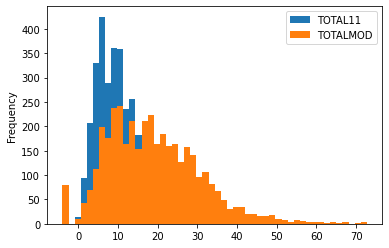

In [29]:
adas[['TOTAL11','TOTALMOD']].plot(kind='hist', bins=50)

In [15]:
mmse.shape

(12949, 76)

In [16]:
mmse.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,MMDATE,...,WORD1DL,WORD2,WORD2DL,WORD3,WORD3DL,WORDLIST,WORLDSCORE,DATE,SOURCE,update_stamp
0,ADNI1,10,2,107,sc,sc,2005-08-17,NaN,2005-08-17,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,12,1,10,f,f,2005-08-18,NaN,2005-08-18,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,14,3,107,sc,sc,2005-08-18,NaN,2005-08-18,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,16,4,10,sc,sc,2005-08-18,NaN,2005-08-18,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,18,5,107,sc,sc,2005-08-23,NaN,2005-08-23,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0


In [21]:
mmse_use = mmse[['RID','MMSCORE']]

<AxesSubplot:ylabel='Frequency'>

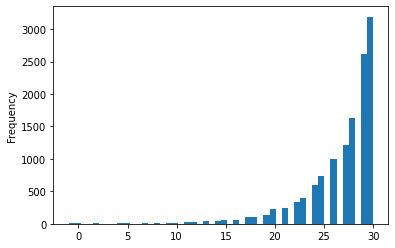

In [28]:
mmse_use['MMSCORE'].plot(kind='hist',bins=50)

In [41]:
base.merge?

In [101]:
base_apoe4 = base.merge(apoe4_use, how='inner', on='RID')

base_apoe4_mmse = base_apoe4.merge(mmse_use, how = 'inner', on = 'RID')

base_apoe4_mmse_adas = base_apoe4_mmse.merge(adas_use, how ='inner', on ='RID')

base_apoe4_mmse_adas = base_apoe4_mmse_adas.drop_duplicates()

In [102]:
base_apoe4_mmse_adas.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU,APGEN1,APGEN2,MMSCORE,TOTAL11,TOTALMOD
0,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,-4.00,-4.00
1,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,6.00,8.00
2,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,4.67,12.67
3,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,7.67,12.67
4,ADNI1,560.0,514,033_S_0514,52,bl,bl,2006-06-12,NaN,2006-06-09,...,2006-06-16,2016-11-28,826.8,10.41,126.6,3,3,26.0,5.00,10.00


## Unique RID

In [107]:
print(len([*set(base_apoe4_mmse_adas['RID'])]),'unique patients')

129 unique patients


In [103]:
base_apoe4_mmse_adas.shape

(4852, 97)

In [109]:
base_apoe4_mmse_adas.to_csv('./baseline_data_revised.csv', index = False)

## Join MMSE, ADAS and Apoe4 to longitudinal baseline data

In [89]:
b_no_bl_mmse = b_no_bl.merge(mmse_use, how = 'inner', on = 'RID')

b_no_bl_mmse_apoe4 = b_no_bl_mmse.merge(apoe4_use, how='inner', on= 'RID')

b_no_bl_mmse_apoe4_adas = b_no_bl_mmse_apoe4.merge(adas_use, how = 'inner', on = 'RID')

In [90]:
b_no_bl_mmse_apoe4_adas.head()

,Phase_x,ID_x,RID,PTID,SITEID_x,VISCODE,VISCODE2,USERDATE_x,USERDATE2_x,EXAMDATE_x,...,EXAMDATE_y,RUNDATE,ABETA,PTAU,TAU,MMSCORE,APGEN1,APGEN2,TOTAL11,TOTALMOD
0,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,-4.00,-4.00
1,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,6.00,8.00
2,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,4.67,12.67
3,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,7.67,12.67
4,ADNI1,1552.0,514,033_S_0514,52,m06,m06,2006-12-08,NaN,2006-12-06,...,2007-06-13,2016-11-28,873.0,11.26,137.6,26.0,3,3,5.00,10.00


In [108]:
print(len([*set(b_no_bl_mmse_apoe4_adas['RID'])]),'unique patients')

101 unique patients


In [91]:
b_no_bl_mmse_apoe4_adas[b_no_bl_mmse_apoe4_adas['RID']==514][['VISCODE','TOTAL11','TOTALMOD','MMSCORE']].head()

,VISCODE,TOTAL11,TOTALMOD,MMSCORE
0,m06,-4.00,-4.00,26.0
1,m06,6.00,8.00,26.0
2,m06,4.67,12.67,26.0
3,m06,7.67,12.67,26.0
4,m06,5.00,10.00,26.0


In [92]:
b_no_bl_mmse_apoe4_adas.shape

(263900, 97)

In [112]:
b_no_bl_mmse_apoe4_adas.to_csv('./normal_bl_that_transitioned_revised.csv')

# Baseline with NaN diagnosis

In [47]:
df1[(df2.VISCODE=='bl') & (df1.DIAGNOSIS.isnull())].shape

/Users/leslieappiah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(950, 54)

# Baseline with diagnosis

In [50]:
df1[(df2.VISCODE=='bl') & (df1.DIAGNOSIS.notnull())].shape

/Users/leslieappiah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(662, 54)

In [51]:
df1[(df2.VISCODE=='bl') & (df1.DIAGNOSIS.notnull())].head()

/Users/leslieappiah/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Phase,ID,RID,PTID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,...,DXPATYP,DXPOTHSP,DXDEP,DXDEPSP,DXOTHDEM,DXODES,DXOOTHSP,DXCONFID,DIAGNOSIS,update_stamp
10019,ADNI3,NaN,4873,027_S_4873,20,init,m54,2017-01-06,2017-01-06,2016-12-02,...,NaN,NaN,0.0,NaN,NaN,9.0,NaN,NaN,3.0,2021-07-29 04:17:59.0
10021,ADNI3,NaN,6001,027_S_6001,20,bl,bl,2017-01-24,2017-01-24,2017-01-19,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2017-10-26 14:25:11.0
10047,ADNI3,NaN,377,037_S_0377,27,init,m132,2017-04-14,2017-04-14,2017-04-07,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,2017-08-02 07:51:05.0
10055,ADNI3,NaN,4654,002_S_4654,1,init,m60,2017-05-04,2017-05-04,2017-05-02,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,2017-08-14 22:27:43.0
10089,ADNI3,NaN,6009,002_S_6009,1,bl,bl,2017-06-05,2017-06-05,2017-05-16,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,2017-10-26 14:25:11.0


In [36]:
df1.SITEID.value_counts()

19     360
2      340
11     332
47     327
20     325
      ... 
63      31
105     25
116     13
89       5
119      5
Name: SITEID, Length: 87, dtype: int64

In [19]:
df2 = pd.read_csv('./Diagnosis/BLCHANGE.csv')

In [21]:
df2.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,BCPREDX,...,BCCDR,BCDEPRES,BCSTROKE,BCDELIR,BCEXTCIR,BCEXTSP,BCCORADL,BCCORCOG,BCSUMM,update_stamp
0,ADNI1,2,7,10,bl,bl,2005-10-13,NaN,2005-10-06,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,Patient has a three year history of gradually ...,2005-10-13 00:00:00.0
1,ADNI1,4,15,4,bl,bl,2005-10-19,NaN,2005-10-19,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,The subject has no complaints of memory proble...,2005-10-19 00:00:00.0
2,ADNI1,6,30,11,bl,bl,2005-10-20,NaN,2005-10-20,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,MCI-stable. Developed severe constipation/abd...,2005-10-20 00:00:00.0
3,ADNI1,8,31,11,bl,bl,2005-10-24,NaN,2005-10-24,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,Few minor symptoms.,2005-10-24 00:00:00.0
4,ADNI1,10,14,10,bl,bl,2005-11-08,NaN,2005-11-04,-4.0,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4,-4.0,-4.0,A 78 year old hispanic female with no memory c...,2005-11-08 00:00:00.0


In [20]:
df2.shape

(13261, 27)

In [30]:
df2.Phase.value_counts()

ADNI2     5666
ADNI1     3871
ADNI3     3249
ADNIGO     475
Name: Phase, dtype: int64

# Check the names from the three dfs in Diagnosis

In [33]:
df0.columns

Index(['Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE',
       'USERDATE2', 'EXAMDATE', 'AXNAUSEA', 'AXVOMIT', 'AXDIARRH', 'AXCONSTP',
       'AXABDOMN', 'AXSWEATN', 'AXDIZZY', 'AXENERGY', 'AXDROWSY', 'AXVISION',
       'AXHDACHE', 'AXDRYMTH', 'AXBREATH', 'AXCOUGH', 'AXPALPIT', 'AXCHEST',
       'AXURNDIS', 'AXURNFRQ', 'AXANKLE', 'AXMUSCLE', 'AXRASH', 'AXINSOMN',
       'AXDPMOOD', 'AXCRYING', 'AXELMOOD', 'AXWANDER', 'AXFALL', 'AXOTHER',
       'AXSPECIF', 'update_stamp'],
      dtype='object')

In [32]:
df1.columns

Index(['Phase', 'ID', 'RID', 'PTID', 'SITEID', 'VISCODE', 'VISCODE2',
       'USERDATE', 'USERDATE2', 'EXAMDATE', 'DXCHANGE', 'DXCURREN', 'DXCONV',
       'DXCONTYP', 'DXREV', 'DXNORM', 'DXNODEP', 'DXMCI', 'DXMDES', 'DXMPTR1',
       'DXMPTR2', 'DXMPTR3', 'DXMPTR4', 'DXMPTR5', 'DXMPTR6', 'DXMDUE',
       'DXMOTHET', 'DXMOTHSP', 'DXDSEV', 'DXDDUE', 'DXAD', 'DXADES', 'DXAPP',
       'DXAPROB', 'DXAMETASP', 'DXAOTHRSP', 'DXAPOSS', 'DXAATYSP', 'DXAMETSP',
       'DXAOTHSP', 'DXPARK', 'DXPARKSP', 'DXPDES', 'DXPCOG', 'DXPATYP',
       'DXPOTHSP', 'DXDEP', 'DXDEPSP', 'DXOTHDEM', 'DXODES', 'DXOOTHSP',
       'DXCONFID', 'DIAGNOSIS', 'update_stamp'],
      dtype='object')

In [31]:
df2.columns

Index(['Phase', 'ID', 'RID', 'SITEID', 'VISCODE', 'VISCODE2', 'USERDATE',
       'USERDATE2', 'EXAMDATE', 'BCPREDX', 'BCADAS', 'BCMMSE', 'BCMMSREC',
       'BCNMMMS', 'BCNEUPSY', 'BCNONMEM', 'BCFAQ', 'BCCDR', 'BCDEPRES',
       'BCSTROKE', 'BCDELIR', 'BCEXTCIR', 'BCEXTSP', 'BCCORADL', 'BCCORCOG',
       'BCSUMM', 'update_stamp'],
      dtype='object')

# Reading from raw text, copy and past

In [10]:
# diagno = pd.read_csv(io.StringIO(text),sep=',')

#diagno.to_csv('new_diagno.csv', index = False)

In [17]:
diagno = pd.read_csv('new_diagno.csv')

In [18]:
diagno.head()

,Phase,ID,RID,SITEID,VISCODE,VISCODE2,USERDATE,USERDATE2,EXAMDATE,AXNAUSEA,...,AXRASH,AXINSOMN,AXDPMOOD,AXCRYING,AXELMOOD,AXWANDER,AXFALL,AXOTHER,AXSPECIF,update_stamp
0,ADNI1,2,2,107,m06,m06,2006-03-07,NaN,2006-03-06,1,...,1,1,1,1,1,1,1,1.0,-4,2006-03-07 00:00:00.0
1,ADNI1,4,5,107,m06,m06,2006-03-09,NaN,2006-03-09,1,...,2,1,1,1,1,1,1,2.0,fever,2006-03-09 00:00:00.0
2,ADNI1,6,3,107,m06,m06,2006-03-13,NaN,2006-03-13,1,...,1,2,1,1,1,1,1,1.0,-4,2006-03-13 00:00:00.0
3,ADNI1,8,8,107,m06,m06,2006-03-21,NaN,2006-03-20,1,...,1,1,1,1,1,1,2,1.0,-4,2006-03-21 00:00:00.0
4,ADNI1,10,7,10,m06,m06,2006-04-13,NaN,2006-04-13,1,...,2,1,2,2,1,1,1,1.0,-4,2006-04-13 00:00:00.0


In [12]:
diagno.shape

(4884, 39)

# Goal is to predict future cognitive status using baseline information via mixture models

In [52]:
text = '''
"ID","FLDNAME","TBLNAME","CRFNAME","QUESTION","TEXT","STATUS","DEPRULE","TYPE","LENGTH","DECIML","RANGEVAL","RANGESQL","RANGEPRL","UNITS","CODE","NOTES","OBJID","COLID","RANGEJSCPT","NAVJSCPT","FTYPE","TAB","DE","MC","VISIBLE","LOGVISIBLE","MTBLNAME","SUBTBLNAME","POPJSCPT","GRID","DEF","update_stamp"
"","RID","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Participant roster ID","-4","-4","-4","-4","-4","-4","-4","-4","","-4","The 4 digit roster ID (RID) should be used to merge data","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","VISCODE","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Visit code","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","VISCODE2","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Translated visit code","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","Months from baseline rounded to nearest 6 months","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","EXAMDATE","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Examination Date","-4","-4","-4","-4","-4","-4","-4","-4","MM/DD/YYYY","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","VID","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Visit number from sample tube","-4","-4","-4","-4","-4","-4","-4","-4","","-4","This is not visit code","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","PLA","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of pristine Plasma aliquots in storage","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","PLAVOL","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Total volume of received Plasma","-4","-4","-4","-4","-4","-4","-4","-4","mL","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","PLA_SENT","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of Plasma aliquots shipped out to other investigators","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","PLA_USED","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of Plasma aliquots used for analysis at Biomarker Core Lab","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","SER","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of pristine Serum aliquots in storage","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","SERVOL","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Total volume of received Serum","-4","-4","-4","-4","-4","-4","-4","-4","mL","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","SER_SENT","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of Serum aliquots shipped out to other investigators","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","SER_USED","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of Serum aliquots used for analysis at Biomarker Core Lab","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","CSF","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of pristine CSF aliquots in storage","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","CSFVOL","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Total volume of received CSF","-4","-4","-4","-4","-4","-4","-4","-4","mL","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","CSF_SENT","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of CSF aliquots shipped out to other investigators","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","CSF_USED","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of CSF aliquots used for analysis at Biomarker Core Lab","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","URN","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of pristine Urine aliquots in storage","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","URNVOL","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Total volume of received Urine","-4","-4","-4","-4","-4","-4","-4","-4","mL","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","URN_SENT","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of Urine aliquots shipped out to other investigators","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","URN_USED","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Count of Urine aliquots used for analysis at Biomarker Core Lab","-4","-4","-4","-4","-4","-4","-4","-4","","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
"","QUERYDATE","ALIQUOT_LIST","Aliquot count in the LDMS database","-4","Date of LDMS database query","-4","-4","-4","-4","-4","-4","-4","-4","MM/DD/YYYY","-4","","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","-4","2020-01-24 16:29:44.0"
'''

In [53]:
dictionary = pd.read_csv(io.StringIO(text),sep=',')

In [55]:
dictionary

,ID,FLDNAME,TBLNAME,CRFNAME,QUESTION,TEXT,STATUS,DEPRULE,TYPE,LENGTH,...,DE,MC,VISIBLE,LOGVISIBLE,MTBLNAME,SUBTBLNAME,POPJSCPT,GRID,DEF,update_stamp
0,NaN,RID,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Participant roster ID,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
1,NaN,VISCODE,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Visit code,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
2,NaN,VISCODE2,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Translated visit code,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
3,NaN,EXAMDATE,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Examination Date,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
4,NaN,VID,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Visit number from sample tube,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
5,NaN,PLA,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Count of pristine Plasma aliquots in storage,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
6,NaN,PLAVOL,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Total volume of received Plasma,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
7,NaN,PLA_SENT,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Count of Plasma aliquots shipped out to other ...,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
8,NaN,PLA_USED,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Count of Plasma aliquots used for analysis at ...,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
9,NaN,SER,ALIQUOT_LIST,Aliquot count in the LDMS database,-4,Count of pristine Serum aliquots in storage,-4,-4,-4,-4,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,2020-01-24 16:29:44.0
